In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%debug

ERROR:root:No traceback has been produced, nothing to debug.


In [2]:
import sys
sys.path.insert(0, "../../code-previous")

In [3]:
import pandas as pd
import numpy as np
import networkx as nx
import sklearn.feature_extraction as skfeatures
import time
import os

import operator

import string
import swifter
import nltk
stopwords = nltk.corpus.stopwords.words('english')


import plotly
import plotly.plotly as py
from plotly import tools

import plotly.graph_objs as go
plotly.tools.set_credentials_file(username='sreejith_s', api_key='rcet0rTqFCc3WeOzWTjv')



from sklearn.feature_extraction.text import CountVectorizer


from unicodedata import category
from tqdm import tqdm
tqdm.pandas(desc="Progress")

import seaborn as sns
sns.set_style('white')
import matplotlib.pylab as plt

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [4]:
data_path = "/mnt/disks/vault/analysis-data/interdisciplinary-novelty-analysis/all_discipline_data.pql"
data = pd.read_pickle(data_path)

In [5]:
data50 = data[data.PubYear == 1950]

In [6]:
data50_group = data50[["Label","title_without_stopwords"]].groupby(data50.Label)["title_without_stopwords"].apply(list)

data50_group = pd.DataFrame(data50_group)

In [7]:
data50_group["title_words"] = data50_group["title_without_stopwords"].apply(lambda x: " ".join(x))

In [23]:
data50_group[:10]

,title_without_stopwords,title_words
Label,,
1ST YEAR,[hyperbrachycephaly influenced cultural condit...,hyperbrachycephaly influenced cultural conditi...
9-YEAR-OLD WHITE MALES,[distribution subcutaneous],distribution subcutaneous
ABILITIES,"[construction validation educational tests, in...",construction validation educational tests inte...
ACCEPTANCE,[counseling methods therapy],counseling methods therapy
ACID,[connective tissue fine structure some methods...,connective tissue fine structure some methods ...
ADIPOSE-TISSUE,[distribution subcutaneous],distribution subcutaneous
ADOLESCENT GIRLS,[card versus booklet forms mmpi],card versus booklet forms mmpi
ADRENAL-CORTICAL RESPONSES,[abnormalities behavior],abnormalities behavior
ADULTS,[rorschach human other movement responses inre...,rorschach human other movement responses inrel...


In [30]:
list(data50_group.index)

['1ST YEAR',
 '9-YEAR-OLD WHITE MALES',
 'ABILITIES',
 'ACCEPTANCE',
 'ACID',
 'ADIPOSE-TISSUE',
 'ADOLESCENT GIRLS',
 'ADRENAL-CORTICAL RESPONSES',
 'ADULTS',
 'ADVANCING AGE',
 'AGE',
 'AGE POPULATION',
 'AIR',
 'ALCOHOLISM',
 'ANATOMY',
 'ANDROSTERONE',
 'ANTHROPOMETRIC MEASUREMENTS',
 'ANTICONVULSANT ACTION',
 'AORTA',
 'APPEARANCE PATTERN',
 'APTITUDE',
 'APTITUDE-TESTS',
 'ART',
 'ARTICLE',
 'ASSOCIATION',
 'ASSUMPTIONS',
 'ATTITUDE SCALES',
 'ATTITUDES',
 'AURICULAR HEIGHT',
 'Acoustics',
 'Agricultural Economics & Policy',
 'Agriculture',
 'Agriculture, Dairy & Animal Science',
 'Agriculture, Multidisciplinary',
 'Agronomy',
 'Allergy',
 'Anatomy & Morphology',
 'Anesthesiology',
 'Anthropology',
 'Archaeology',
 'Area Studies',
 'Arts & Humanities',
 'Arts & Humanities - Other Topics',
 'Astronomy & Astrophysics',
 'Audiology & Speech-Language Pathology',
 'BACKWARDNESS',
 'BACTERIA',
 'BALANCE',
 'BATTERY',
 'BEHAVIOR',
 'BETA-HEMOLYTIC STREPTOCOCCI',
 'BINOCULAR IMBALANCE',


In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(use_idf=True)
vectorized_words = vectorizer.fit_transform(data50_group.title_words)

In [22]:
data50_group.columns

Index(['title_without_stopwords', 'title_words'], dtype='object')

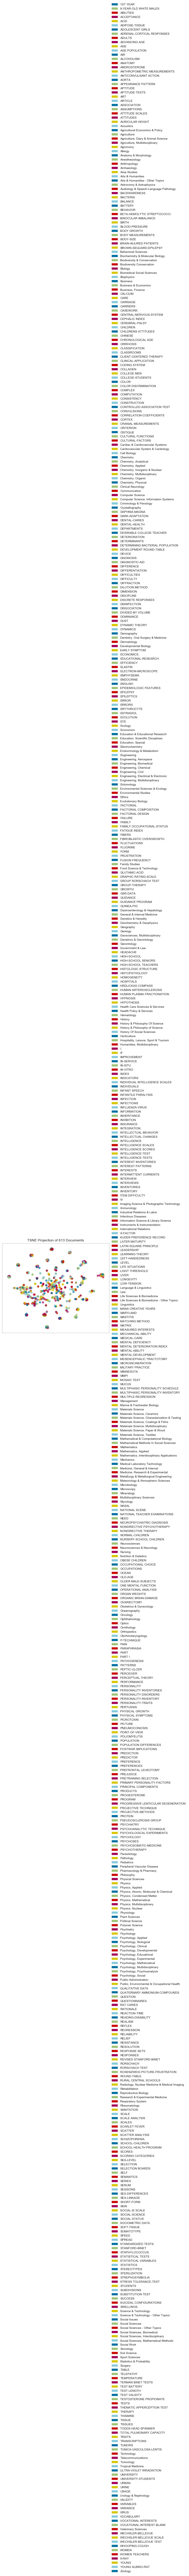

In [31]:
from yellowbrick.text import TSNEVisualizer

tsne = TSNEVisualizer()
tsne.fit(vectorized_words, list(data50_group.index))
tsne.poof()